<a href="https://colab.research.google.com/github/michaelgodoyf/tareas-proc-digi-multimedia/blob/main/Actividad_6_michael_godoy_f_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Michael Godoy Ferreira</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [1]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 308 (delta 42), reused 59 (delta 14), pack-reused 219
Receiving objects: 100% (308/308), 10.78 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (136/136), done.


Señal de audio cargada con éxito.


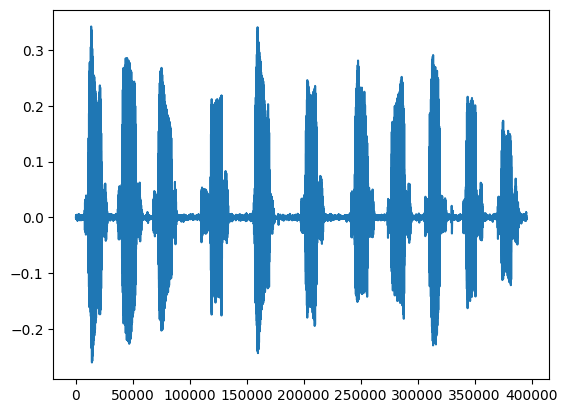

In [69]:
from IPython.display import Audio
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo de audio
ruta_audio = "/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav"

# Carga el archivo de audio
señal_audio, tasa_muestreo = librosa.load(ruta_audio, sr=None)

#  información sobre la señal de audio
print("Señal de audio cargada con éxito.")
señal_audio
Audio(señal_audio, rate=44100)
plt.plot(señal_audio)


In [70]:
Audio(señal_audio,rate=44100)

# ***media***

In [71]:
suma_audio = 0

# Suma de los valores de la señal de audio
for i in range(len(señal_audio)):
    suma_audio += señal_audio[i]

# Cálculo del promedio de la señal de audio
promedio_audio = suma_audio / len(señal_audio)
print("media:", promedio_audio)



media: 2.448154589854113e-05


# ***kurtosis***

In [72]:
# Calcula la media
media = np.mean(señal_audio)
# Centra los datos
datos_centrales = señal_audio - media
# Calcula las desviaciones al cuadrado
desviaciones_al_cuadrado = datos_centrales**2
# Calculala varianza
varianza = np.mean(desviaciones_al_cuadrado)
# Calcula la kurtosis
kurtosis = np.mean((datos_centrales**4) / (varianza**2)) - 3

print("kurtosis:", kurtosis)


kurtosis: 4.794886112213135


# ***Skewness***

In [73]:
import scipy.stats as stats
Skewness=stats.skew(señal_audio)
Skewness

0.7395780614296674

# ***zero crossing rate***

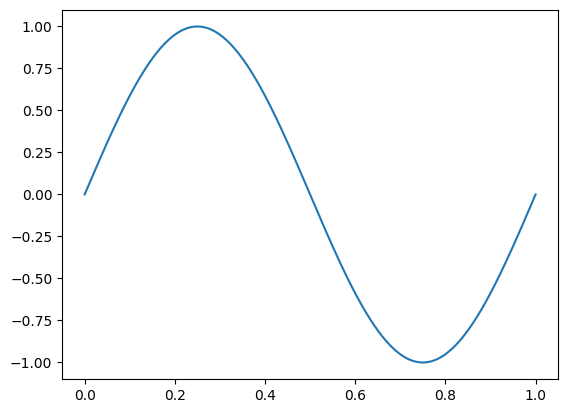

In [74]:
f=1
t=np.linspace(0,1,1000)
fn=np.sin(2*np.pi*f*t)
plt.plot(t,fn)

# ***ENERGIA***

In [75]:
# Calcula la energía en el dominio del tiempo
energia_tiempo = np.sum(np.square(señal_audio))

print("Energía en el dominio del tiempo:", energia_tiempo)


Energía en el dominio del tiempo: 1191.5756


# ***RMSE***

In [76]:
import librosa
import numpy as np

# Calcula la energía RMS
energia = librosa.feature.rms(y=y)

# Calcula el promedio de la energía
energia_promedio = np.mean(energia)

# Imprimir la energía promedio
print(f"Energía promedio: {energia_promedio}")


Energía promedio: 0.03632744401693344


# frecuencia ***fundamental***

In [77]:
import librosa
import numpy as np


# Calcula la tonica usando librosa
tonica = librosa.pyin(y, fmin=85, fmax=180, sr=44100)

# Imprimir la media del tercer elemento de la tonica
print(np.mean(tonica[2]))


0.39105797634467765


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


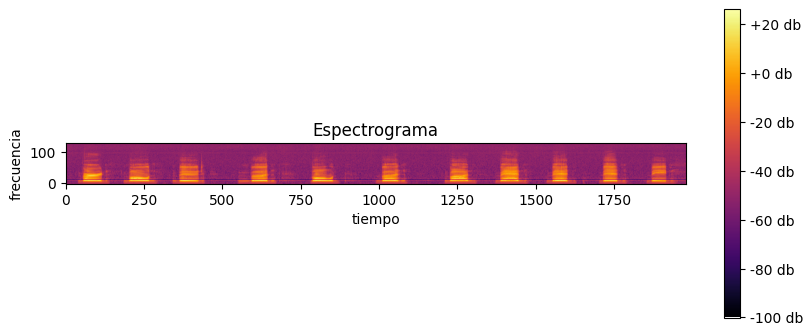

In [78]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Carga el archivo de audio
waveforms, sample_rate = torchaudio.load("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")

# Calcula el espectrograma de Mel
espectrograma = torchaudio.transforms.MelSpectrogram()(waveforms)

# Convierte  el espectrograma a escala logarítmica
espectrograma_log = torchaudio.transforms.AmplitudeToDB()(espectrograma)

# Visualiza el espectrograma
plt.figure(figsize=(10, 4))
plt.imshow(espectrograma_log[0].numpy(), cmap="inferno", origin="lower")
plt.xlabel("tiempo")
plt.ylabel("frecuencia")
plt.title("Espectrograma")
plt.colorbar(format="%+2.0f db")
plt.show()


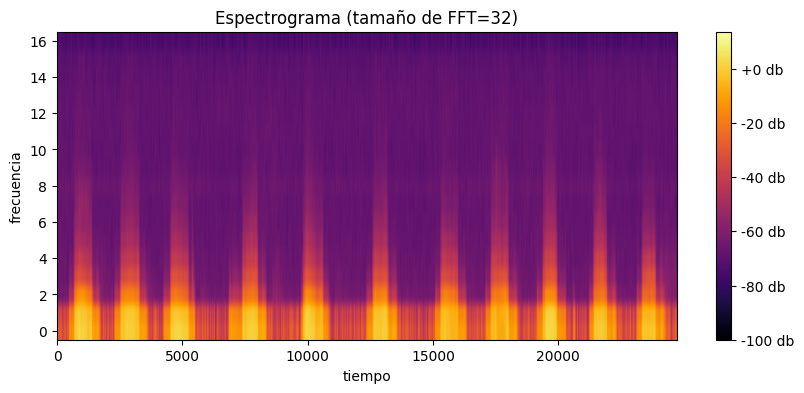

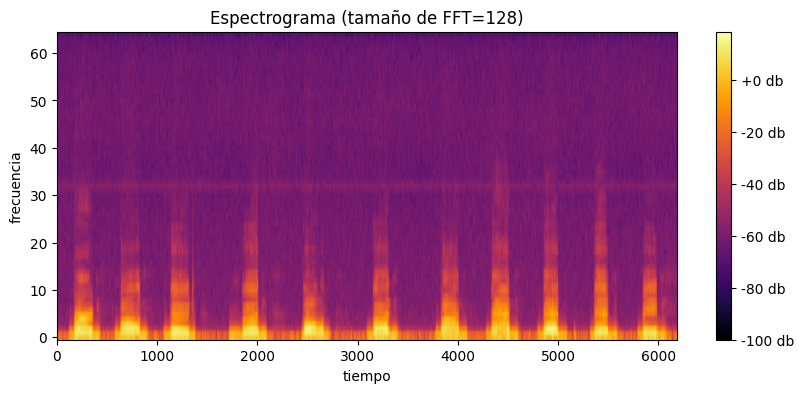

In [79]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Carga el archivo de audio
waveforms, sample_rate = torchaudio.load("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")

# Tamaño de FFT a probar
tamaños_fft = [32, 128]

# Iterar sobre los diferentes tamaños de FFT
for tamaño_fft in tamaños_fft:
    # Calcula el espectrograma
    espectrograma = torchaudio.transforms.Spectrogram(n_fft=tamaño_fft)(waveforms)
    # Convierte  el espectrograma a escala logarítmica
    espectrograma_db = torchaudio.transforms.AmplitudeToDB()(espectrograma)

    # Visualiza el espectrograma
    plt.figure(figsize=(10, 4))
    plt.imshow(espectrograma_db[0].numpy(), cmap="inferno", origin="lower", aspect="auto")
    plt.title(f"Espectrograma (tamaño de FFT={tamaño_fft})")
    plt.xlabel("tiempo")
    plt.ylabel("frecuencia")
    plt.colorbar(format="%+2.0f db")
    plt.show()





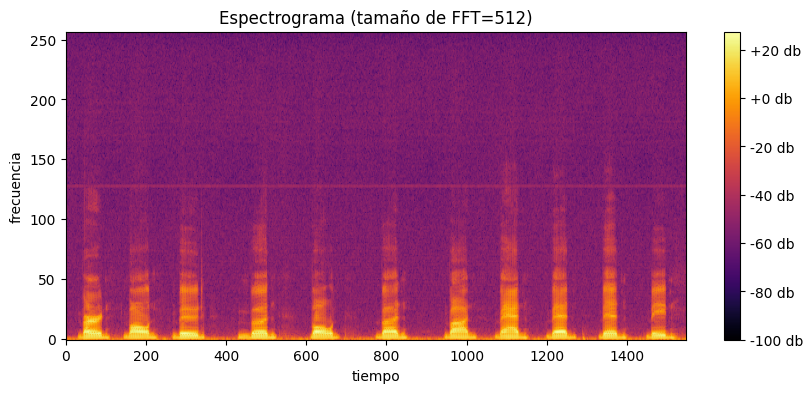

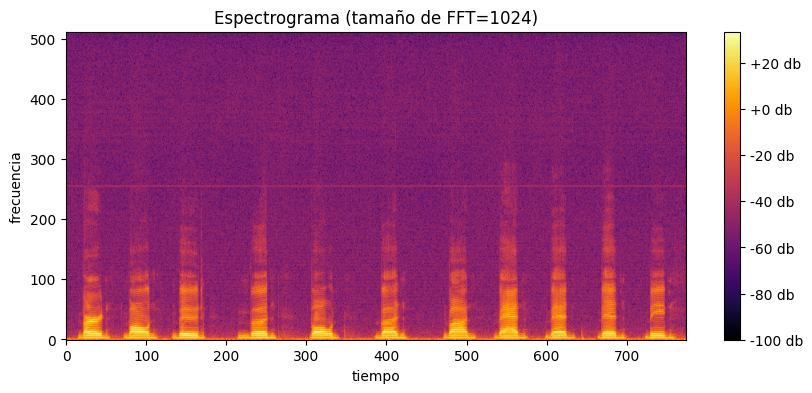

In [80]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Carga el archivo de audio
waveforms, sample_rate = torchaudio.load("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")

# Tamaños de FFT a probar
tamaños_fft = [512, 1024]

# Itera sobre los diferentes tamaños de FFT
for tamaño_fft in tamaños_fft:
    # Calcula el espectrograma
    espectrograma = torchaudio.transforms.Spectrogram(n_fft=tamaño_fft)(waveforms)
    # Convierte el espectrograma a escala logarítmica
    espectrograma_db = torchaudio.transforms.AmplitudeToDB()(espectrograma)

    # Visualiza el espectrograma
    plt.figure(figsize=(10, 4))
    plt.imshow(espectrograma_db[0].numpy(), cmap="inferno", origin="lower", aspect="auto")
    plt.title(f"Espectrograma (tamaño de FFT={tamaño_fft})")
    plt.xlabel("tiempo")
    plt.ylabel("frecuencia")
    plt.colorbar(format="%+2.0f db")
    plt.show()

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
